In [1]:
#C:\Users\segar\Desktop\glove.6B
import os
import numpy as np
glove_dir = 'C:\\Users\\segar\\Desktop\\glove.6B'
embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs
f.close()


In [2]:
print(len(embedding_index))

400000


In [3]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 10000)
word_index = tokenizer.word_index

Using TensorFlow backend.


In [4]:
embedding_dim = 100
max_words = 10000
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = 20))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1024512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 2,025,025
Trainable params: 2,025,025
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [7]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [9]:
print(x_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [10]:
from keras import preprocessing
max_len = 20
x_train = preprocessing.sequence.pad_sequences(x_train,max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,max_len)

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [12]:
history = model.fit(x_train,y_train,epochs = 10, batch_size = 32, validation_data = (x_val,y_val))


Train on 25000 samples, validate on 1000 samples
Epoch 1/10
25000/25000 [==============================] - 10s 413us/step - loss: 0.6932 - acc: 0.4966 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 2/10
25000/25000 [==============================] - 9s 380us/step - loss: 0.6932 - acc: 0.4960 - val_loss: 0.6931 - val_acc: 0.5060
Epoch 3/10
25000/25000 [==============================] - 9s 362us/step - loss: 0.6931 - acc: 0.5022 - val_loss: 0.6931 - val_acc: 0.5060
Epoch 4/10
25000/25000 [==============================] - 10s 394us/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.5060
Epoch 5/10
25000/25000 [==============================] - 7s 288us/step - loss: 0.6932 - acc: 0.5022 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 6/10
25000/25000 [==============================] - 6s 240us/step - loss: 0.6932 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 7/10
25000/25000 [==============================] - 6s 230us/step - loss: 0.6932 - acc: 0.5021 - val_loss: 0.6931 

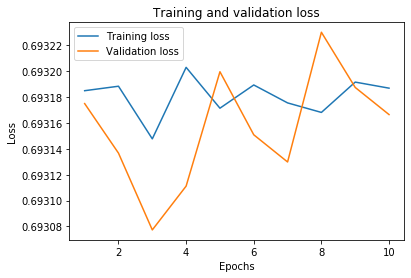

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

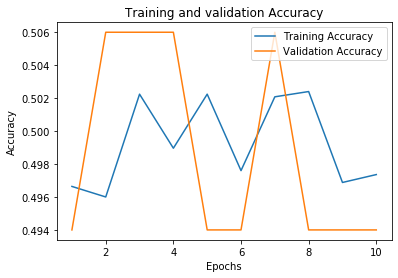

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
result =model.evaluate(x_test,y_test)
print(result)

25000/25000 [==============================] - 1s 35us/step
[0.6931483315849304, 0.5]
